In [1]:
import pandas as pd
import numpy as np

In [4]:
train = pd.read_csv('fashion-mnist_train.csv')
test = pd.read_csv('fashion-mnist_test.csv')
xtrain = train.drop(['label'], axis=1)
xtest = test.drop(['label'], axis=1)
ytrain = train['label']
ytest = test['label']

In [5]:
xtest

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,9,8,0,...,103,87,56,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,34,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,14,53,99,17,...,0,0,0,0,63,53,31,0,0,0
3,0,0,0,0,0,0,0,0,0,161,...,137,126,140,0,133,224,222,56,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0,0,0,0,0,0,0,0,0,37,...,32,23,14,20,0,0,1,0,0,0
9996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,2,52,23,28,0,0,0
9997,0,0,0,0,0,0,0,0,0,0,...,175,172,172,182,199,222,42,0,1,0
9998,0,1,3,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [6]:
ytest

0       0
1       1
2       2
3       2
4       3
       ..
9995    0
9996    6
9997    8
9998    8
9999    1
Name: label, Length: 10000, dtype: int64

In [30]:
xtrain = xtrain.astype('float32')/255.0
xtest = xtest.astype('float32')/255.0

xtrain_reshaped = xtrain.values.reshape(-1,28,28,1)
xtest_reshaped = xtest.values.reshape(-1,28,28,1)

MemoryError: Unable to allocate 359. MiB for an array with shape (784, 60000) and data type float64

In [9]:
labels = ['t-shirt', 'trouser', 'pullover', 'dress', 'coat', 'sandal', 'sneakers', 'shirt', 'bag', 'ankle boots']


pullover


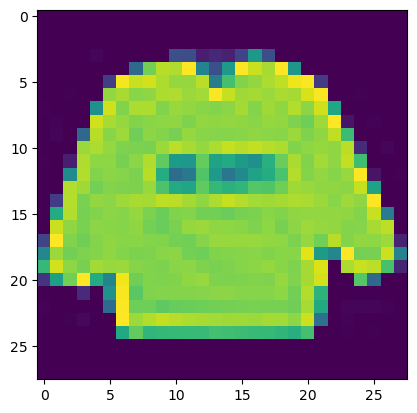

ankle boots


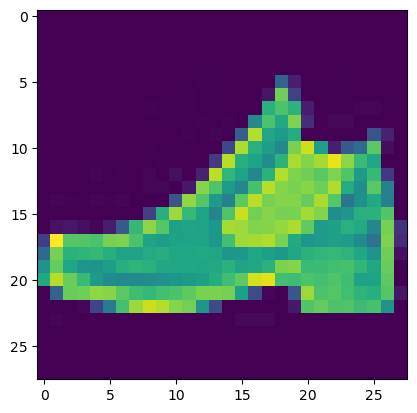

sneakers


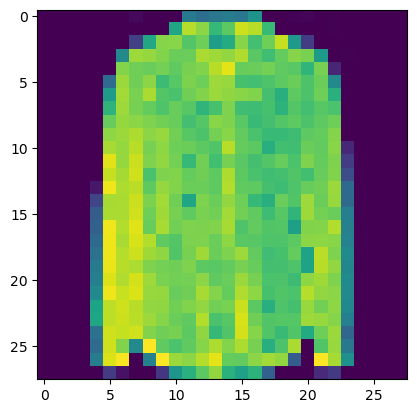

t-shirt


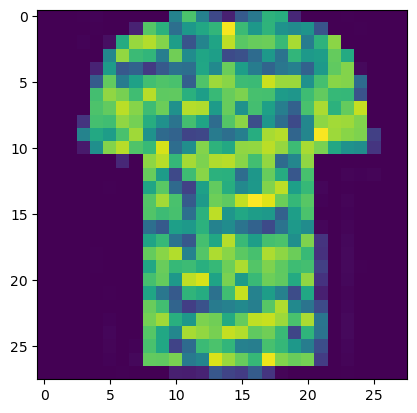

dress


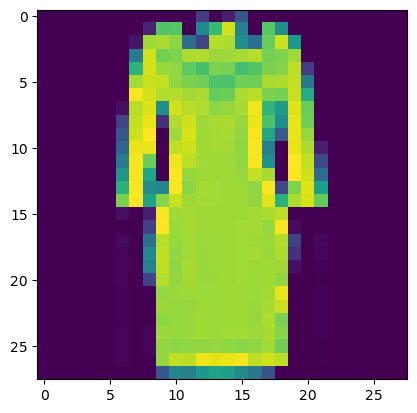

coat


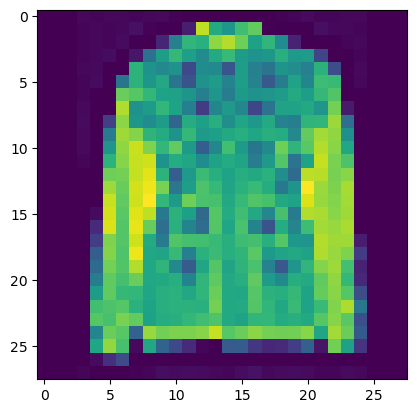

coat


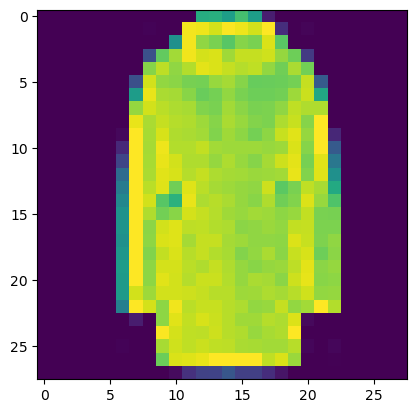

sandal


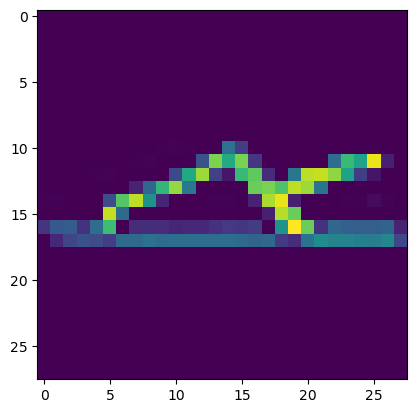

coat


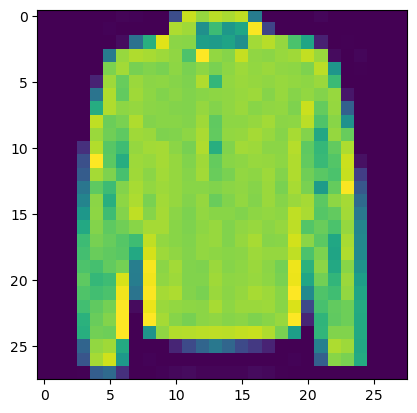

bag


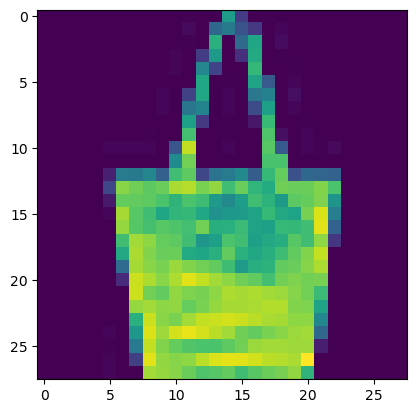

t-shirt


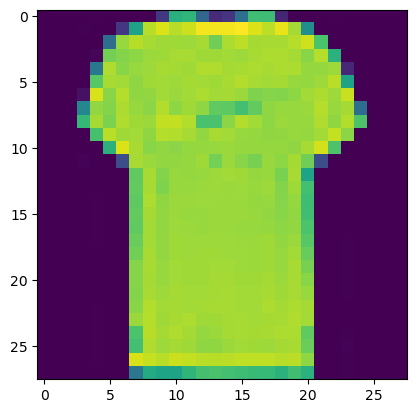

bag


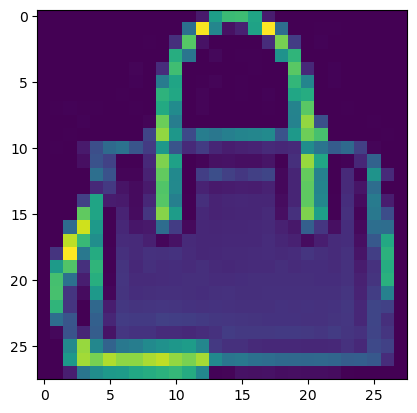

ankle boots


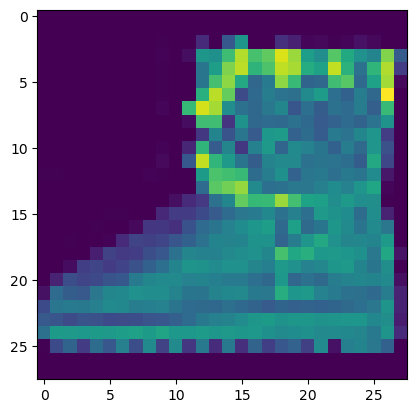

t-shirt


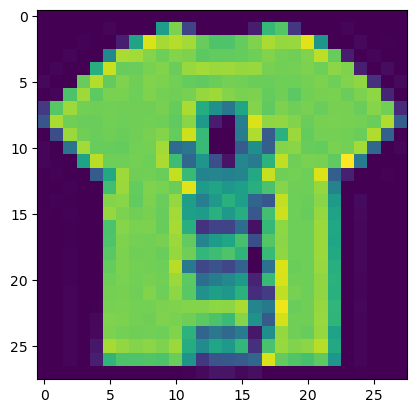

pullover


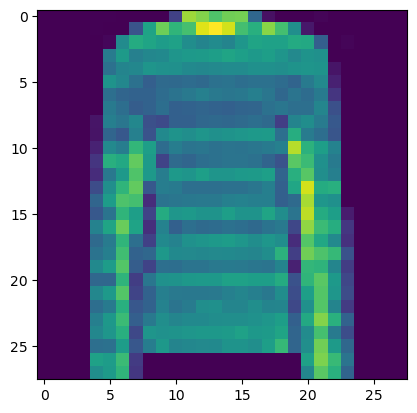

pullover


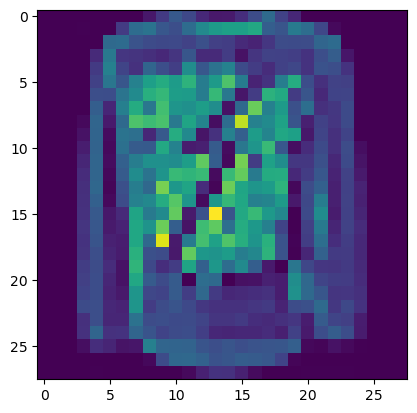

ankle boots


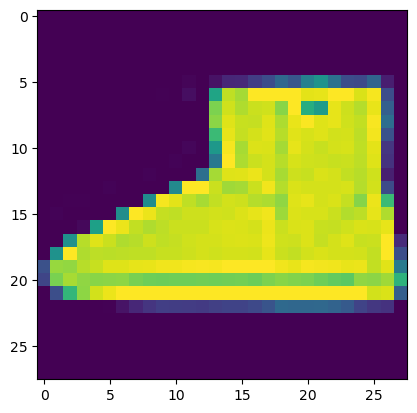

dress


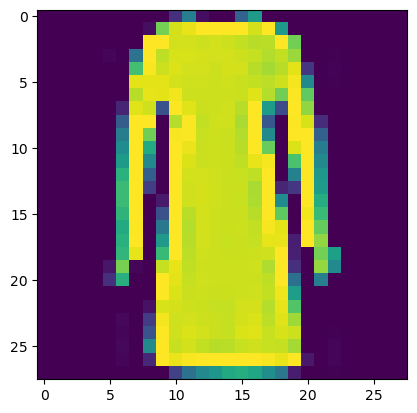

dress


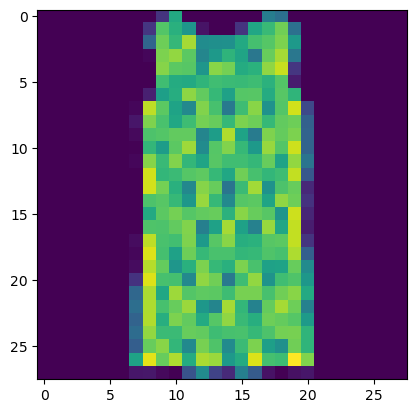

dress


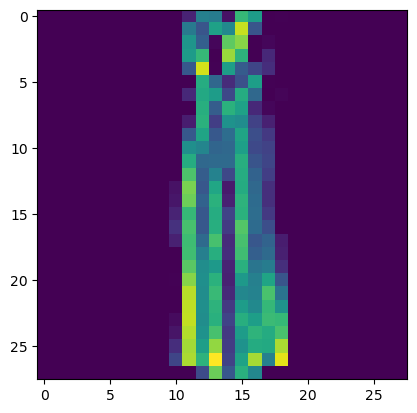

In [11]:
import matplotlib.pyplot as plt
for i in range(20):
    print(labels[ytrain[i]])
    plt.imshow(xtrain_reshaped[i])
    plt.show()

In [14]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense , Flatten , Conv2D , MaxPooling2D

In [15]:
model = Sequential()

In [17]:
model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu', input_shape=(28,28,1)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())

In [18]:
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_1 (Conv2D)                    │ (None, 26, 26, 64)          │             640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 13, 13, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 10816)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       1,384,576 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,386,506 (5.29 MB)

 Trainable params: 1,386,506 (5.29 MB)

 Non-trainable params: 0 (0.00 B)

In [23]:
model.fit(xtrain_reshaped, ytrain, epochs=5, batch_size=32, validation_data=(xtest_reshaped, ytest))

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 34s 17ms/step - accuracy: 0.5390 - loss: 1.3266 - val_accuracy: 0.7705 - val_loss: 0.6260
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 31s 17ms/step - accuracy: 0.7791 - loss: 0.5940 - val_accuracy: 0.8088 - val_loss: 0.5340
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 31s 16ms/step - accuracy: 0.8095 - loss: 0.5160 - val_accuracy: 0.8345 - val_loss: 0.4803
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 30s 16ms/step - accuracy: 0.8333 - loss: 0.4629 - val_accuracy: 0.8450 - val_loss: 0.4427
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 30s 16ms/step - accuracy: 0.8439 - loss: 0.4380 - val_accuracy: 0.8539 - val_loss: 0.4151


In [24]:
loss,acc = model.evaluate(xtest_reshaped , ytest)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8517 - loss: 0.4148


In [25]:
labels = ['t-shirt','trouser','pullover','dress','coat','sandal','sneakers','shirt','bag','ankle boots']

In [26]:
predictions = model.predict(xtest_reshaped[:1])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step


In [27]:
label = labels[np.argmax(predictions)]

t-shirt


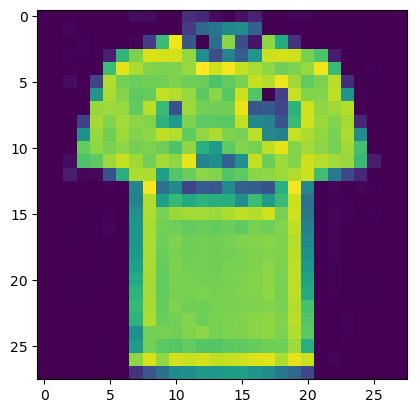

In [29]:
print(label)
plt.imshow(xtest_reshaped[:1][0])
plt.show()